<a href="https://colab.research.google.com/github/Tavo826/UN/blob/main/Covid_19_Infected_LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis base de datos del covid-19

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from joblib import dump

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import mode
from datetime import date

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


In [ ]:
# Novel
csv_path_link = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'

# Kaggle
#csv_path_link = 'https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#time_series_covid_19_confirmed.csv'

Xdata = pd.read_csv(csv_path_link)
Xdata.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284


In [ ]:
def window(serie, w=5):
    pi =0
    pf = w
    X = serie[pi:pf].reshape(1,-1)
    y = serie[pf].reshape(1,-1)
    pi += 1
    pf += 1
    while pf+1 <= serie.shape[0]:
        X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0)
        y = np.append(y,serie[pf].reshape(1,-1),axis=0)
        pi += 1
        pf += 1
    return X, y # X \in Real^{N x P = w}, y \in Real^N

#Contagios acumulados
serie = np.array(Xdata.iloc[
    np.where(Xdata[Xdata.columns[1]] == 'Colombia')[0][0], 4:])

#Contagios por día
serie_d = np.append(0, np.diff(serie))

#Ventaneo
w = 5
X,y = window(serie, w)
Xd,yd = window(serie_d, w)

print('Serie:', serie.shape)
print('X:', X.shape)
print('y:', y.shape)
print('Xd:', Xd.shape)
print('Xd:', yd.shape)

Serie: (161,)
X: (156, 5)
y: (156, 1)
Xd: (156, 5)
Xd: (156, 1)


In [ ]:
print(serie)
print(serie_d)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 3 9 9 13 22 34 54 65 93 102 128 196 231 277 378 470
 491 539 608 702 798 906 1065 1161 1267 1406 1485 1579 1780 2054 2223 2473
 2709 2776 2852 2979 3105 3233 3439 3439 3792 3977 4149 4356 4561 4881
 5142 5379 5597 5949 6207 6507 7006 7285 7668 7973 8613 8959 9456 10051
 10495 11063 11613 12272 12930 13610 14216 14939 15574 16295 16935 17687
 18330 19131 20177 21175 21981 23003 24104 24141 25406 26734 27219 29384
 30593 31935 33466 36759 36759 38149 40847 40847 42206 43810 45344 46994
 48896 53168 53211 55083 57202 60387 63454 68836 71367 73760 73760 77313
 80811 84660 91995 91995 95269]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 2 6 0 4 9 12 20 11 28 9 26 68 35 46 101 92 21 48 69
 94 96 108 159 96 106 139 79 94 201 274 169 250 236 67 76 127 126 128 206
 0 353 185 172 207 205 320 261 237 218 352 258 300 499 279 383 305 640 346
 497 595 

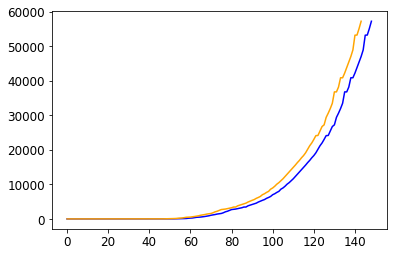

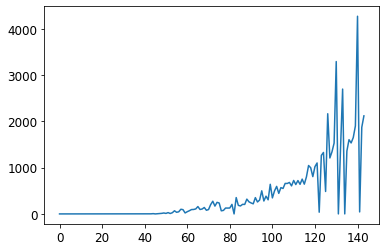

In [ ]:
# Plotendo la curva

plt.plot(serie, 'b')
plt.plot(y, 'orange')
plt.figure()
plt.plot(yd)
plt.show()

# Análisis Exploratorio

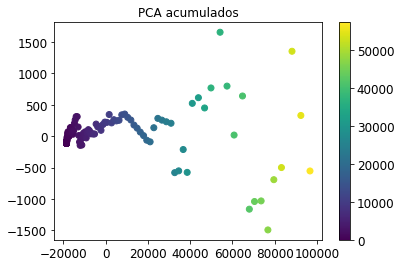

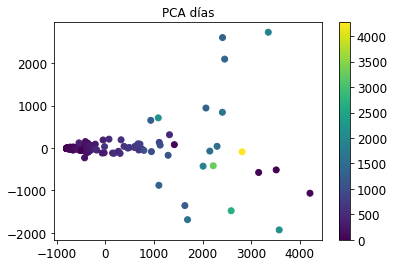

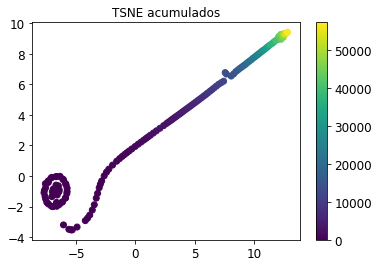

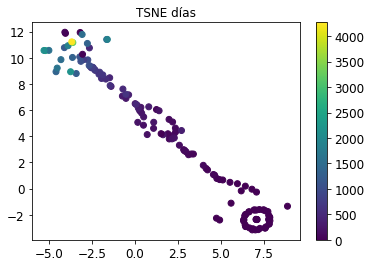

In [ ]:
red_pca = PCA(n_components=None, 
              copy=True, 
              whiten=False, 
              svd_solver='auto', 
              tol=0.0, 
              iterated_power='auto', 
              random_state=None)

red_d_pca = PCA(n_components=None, 
              copy=True, 
              whiten=False, 
              svd_solver='auto', 
              tol=0.0, 
              iterated_power='auto', 
              random_state=None)

red_tsne = TSNE(n_components=2, 
                perplexity=30.0, 
                early_exaggeration=12.0, 
                learning_rate=200.0, 
                n_iter=1000, 
                n_iter_without_progress=300, 
                min_grad_norm=1e-07, 
                metric='euclidean', 
                init='random', 
                verbose=0, 
                random_state=None, 
                method='barnes_hut', 
                angle=0.5, 
                n_jobs=None)

red_d_tsne = TSNE(n_components=2, 
                perplexity=30.0, 
                early_exaggeration=12.0, 
                learning_rate=200.0, 
                n_iter=1000, 
                n_iter_without_progress=300, 
                min_grad_norm=1e-07, 
                metric='euclidean', 
                init='random', 
                verbose=0, 
                random_state=None, 
                method='barnes_hut', 
                angle=0.5, 
                n_jobs=None)

z_pca = red_pca.fit_transform(X)
zd_pca = red_d_pca.fit_transform(Xd)
z_tsne = red_tsne.fit_transform(X)
zd_tsne = red_d_tsne.fit_transform(Xd)

plt.figure()
plt.scatter(z_pca[:,0],z_pca[:,1], c=y[:,0])
plt.colorbar()
plt.title('PCA acumulados')

plt.figure()
plt.scatter(zd_pca[:,0],zd_pca[:,1], c=yd[:,0])
plt.colorbar()
plt.title('PCA días')

plt.figure()
plt.scatter(z_tsne[:,0],z_tsne[:,1], c=y[:,0])
plt.colorbar()
plt.title('TSNE acumulados')

plt.figure()
plt.scatter(zd_tsne[:,0],zd_tsne[:,1], c=yd[:,0])
plt.colorbar()
plt.title('TSNE días')

plt.show()

Se pretende ajustar los hiperparámetros de algunos regresores lineales:

* Regresor lineal (mínimos cuadrados o máxima verisimilitud)
* Regresor Ridge (Regresión bayesiana al ruido isotrópico o regularización de tikonov)
* Regresor Lasso (en vez de norma 2, pone norma 1)
* ElasticNet (mezcla de las 2 normas)
* Kernel Ridge (aplica kernel trick)

Esto con el fin de poder realizar predicciones en el ventaneo anteriormente hecho, y así, estimar el valor del día siguiente de cada una de las ventanas.

A continuación se profundiza en el funcionamiento de cada uno de estos regresores.

### Regresor Lineal

Este regresor ajusta un modelo con con coeficientes $\theta = ({\theta}_{1}, ...,{\theta}_{p})$ para minimizar la suma residual de cuadrados entre los objetvos observados en el dataset, y los objetivos predichos por la aproximación lineal.

La salida estimada de este regresor se da por 

\begin{equation}
    \hat{y} = F(X|\theta) = X\theta = {\theta}_{0}+{\theta}_{1}{x}_{1}+{\theta}_{2}{x}_{2}+...+{\theta}_{n}{x}_{n}
\end{equation}


* $\hat{y}$ es el valor predicho
* n es el número de características
* ${x}_{i}$ es el valor de la iésima característica
* ${\theta}_{j}$ es el parámetro jotaésimo del modelo (incluyendo el término de sesgo ${\theta}_{0}$ y los pesos de las características ${\theta}_{1},{\theta}_{2},...,{\theta}_{n}$)

Para entrenar el modelo, se debe tener una medida que describa que tan bien se está ajustando el conjunto de entrenamiento. Para esto se usa el Root Mean Square Error (RMSE), y se busca un $\theta$ que minimice este valor, para eso, solo se debe minimizar el Mean Square Error (MSE)

\begin{equation}
    MSE(X,{h}_{\theta})=MSE(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}-y^{(i)})^{2}
\end{equation}

El error se calcula como ${{\left\|y - \hat{y}\right\|}_{2}}^{2}$

La función de coste se da como ${\theta}^{*} = \underset{min}{arg} l(y, f(X(\theta))$

Para encontrar el $\theta$ que minimice la función de costo, se utilizan mínimos cuadrados, si el modelo lineal tiene un error, se usa la máxima verosimilitud, ambos dan como resultado $\theta = {({X}^{T}X)}^{-1}{X}^{T}y$

### Regresor Ridge

Es una versión regularizada de la regresión lineal, se añade un término de regularización a la función de costo igual a $\alpha \sum_{i=1}^{n} {\theta}_{i}^{2}$ que también se puede ver como $\alpha{{\left\|\theta\right\|}_{2}}^{2}$ también llamado regularización Tikonov. Esto fuerza al modelo, no solo a ajustar los datos, sino a mantener los pesos del modelo lo más pequeños que sea posible. El término de regularización debe agregarse solamente a la función de costo durante el entrenamiento. Una vez que el modelo está entrenado, se quiere evaluar el rendimiento del modelos usando la medida de rendimiento no-regularizada.

El hiperparámetro $\alpha$ controla cuánto se quiere regularizar el modelo. Si $\alpha=0$, entonces la Ridge Regression es simplemente una Linear Regression. SI $\alpha$ es muy grande, todos los pesos estarán muy cerca de cero y el resultado es una línea delgada que va a través de la media de los datos.

\begin{equation}
        {\theta}^{*}=MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n} {\theta}_{i}^{2} = \underset{min}{arg} {{\left\|y - \hat{y}\right\|}_{2}}^{2} + \alpha{{\left\|\theta\right\|}_{2}}^{2}
\end{equation}

El término de bias ${\theta}_{0}$ no está regularizado (la suma comienza en i=1, y no en 0). Si se define **w** como el vector de pesos de características (${\theta}_{1}$ a ${\theta}_{n}$), entonces el término de regularización es igual a $\frac{1}{2}{{(\parallel w\parallel_2)}}^{2}$, donde ${\parallel w \parallel}_{2}$ representa la norma ${\ell}_{2}$ del vector de peso.

**Es importante escalar los datos antes de utilizar Ride Regression**

### Regresor Lasso

Añade un término de regularización a la función de coste, pero usa la norma ${\ell}_{1}$ del vector de pesos en lugar del cuadrado de la norma ${\ell}_{2}$

\begin{equation}
    {\theta}^{*} = MSE(\theta) + \alpha \sum_{i=1}^{n} \mid {\theta}_{i} \mid = \underset{min}{arg} {{\left\|y - \hat{y}\right\|}_{2}}^{2} + \alpha{\left\|\theta\right\|}_{1}
\end{equation}

### Elastic Net

Es un punto medio entre Ride Regression y Lasso Regression. El término de regularización es una mezcla de los términos de cada una de las regresiones y puede controlarse el radio de mezcla r.

\begin{equation}
    {\theta}^{*} = MSE(\theta) + r\alpha \sum_{i=1}^{n} \mid {\theta}_{i} \mid + \frac{1-r}{2}\alpha \sum_{i=1}^{n} {\theta_i}^{2} = \underset{min}{arg} {{\left\|y - \hat{y}\right\|}_{2}}^{2} + r\alpha{\left\|\theta\right\|}_{1} + \frac{1-r}{2}\alpha{{\left\|\theta\right\|}_{2}}^{2}
\end{equation}

### Kernel Ridge

Esta regresión combina **Ridge Regression** con el kernel trick

* Kernel Trick: permite operar en un espacio de características multidimensional sin calcular las coordenadas de los datos en ese espacio, sino simplemente calculando los productos internos entre las imágenes de todos los pares de datos en el espacio de características. $k(x,{x}^{\prime}) = \langle\varphi(x),\varphi({x}^{\prime})\rangle = {\varphi(x)}^{T} \varphi({x}^{\prime})$


Por lo tanto, aprende una función lineal en el espacio inducida por el kernel respectivo y los datos. Para kernels no lineales, esto corresponde a una función no lineal en el espacio original.

Como función de pérdida se usa el error al cuadrado.

# Contagios acumulados

In [ ]:
#Clase t-SNE

class tsne_map(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2, perplexity=10, n_neighbors=3):
        self.n_components = n_components
        self.perplexity = perplexity
        self.n_neighbors = n_neighbors
        return None
        
    def fit(self, X, *_):
        red = TSNE(n_components = self.n_components, perplexity = self.perplexity)
        z = red.fit_transform(X)
        
        self.neigh = KNeighborsRegressor(n_neighbors = self.n_neighbors)
        self.neigh.fit(X, z)
        return self
    
    def transform(self, X, *_):
        return self.neigh.predict(X)
    
    def fit_transform(self, X, *_):
        self.fit(X)
        red = TSNE(n_components = self.n_components, perplexity = self.perplexity)
        return self.transform(X)

In [ ]:
steps = [
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', LinearRegression(fit_intercept = 'False'))],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', LinearRegression())],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', Ridge())],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', Lasso())],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', ElasticNet())],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', KernelRidge(kernel = 'rbf'))],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', KernelRidge(kernel = 'sigmoid'))],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', KernelRidge(kernel = 'laplacian'))],
    
    [('scaler', StandardScaler()),
    ('rep', tsne_map(n_components = 2,  
                     perplexity = 10, 
                     n_neighbors = 3)),
    ('reg', KernelRidge(kernel = 'sigmoid'))],
    
    
]

params = [
    
    {'rep__n_components': [0.1, 0.5, 0.9],
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,10)     
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5)
    }, #max_iter por defecto 1000
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5),
     'reg__l1_ratio': np.linspace(0.1,1,5)
    }, #max_iter por defecto 1000
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5),
     'reg__gamma': np.linspace(0.1,1,5),
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5),
     'reg__gamma': np.linspace(0.1,1,5),
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5),
     'reg__gamma': np.linspace(0.1,1,5),
    },    

    {'reg__alpha': [0.1, 0.5, 0.9],
     'reg__gamma': np.linspace(0.1,1,5),
    }
    
]


label_model = ['Linear', 'Linear fit', 'Ridge', 'Lasso', 'Elastic', 
               'Kernel rbf', 'Kernel sigmoid', 'Kernel laplacian', 'Kernel sigmoid t-sne']

Como son muy pocos datos, se debe hacer validación cruzada anidada

In [ ]:
Niter = 10 #Número de particiones
mae = np.zeros((Niter, len(steps))) #Error absoluto
best_estimators = Niter*[len(steps)*[None]]
best_hyperparams = Niter*[len(steps)*[None]]

for j in range(Niter):
    
    print("Iteración %d/%d" %(j+1, Niter))
    Xtrain, Xtest, ytrain, ytest = train_test_split(
        X,y,test_size=0.3) #Xtrain(70%) ytrain(30%)
    
    #Recorre los modelos
    for r in range(len(steps)):
        
        grid_search = GridSearchCV(Pipeline(steps[r]), params[r],
                cv=5, verbose=5, scoring='neg_mean_absolute_error', n_jobs=4)
        
        #Entrenando
        grid_search.fit(Xtrain, ytrain)
        
        #Realizando predicción con el mejor modelo
        ypred = grid_search.best_estimator_.predict(Xtest)
        
        #Guardando el mejor modelo
        best_estimators[j][r] = grid_search.best_estimator_
        
        #Guardando los mejores hiperparámetros
        best_hyperparams[j][r] = grid_search.best_params_
        
        #Guardando error
        mae[j,r] = mean_absolute_error(ytest, ypred)
        
        print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(steps)))
        print('mae:',mae[j,r])

        savedata = {
            'acc':mae,
            'best_models':best_estimators,
            'best_parameters':best_hyperparams,
              } 
        dump(savedata,'covid19_1.joblib')

Iteración 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 1/10-Modelo 1/9
mae: 62.37611917476592
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 1/10-Modelo 2/9
mae: 62.37611917476592
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 1/10-Modelo 3/9
mae: 62.76490119071466
Fitting 5 folds for each of 15 candidates, totalling 75 fits
it 1/10-Modelo 4/9
mae: 62.4054514924758
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 1/10-Modelo 5/9
mae: 62.4054514924758
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 1/10-Modelo 6/9
mae: 52.948079847521676
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 1/10-Modelo 7/9
mae: 53.80262329650979
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 1/10-Modelo 8/9
mae: 69.71538028524088
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    7.6s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    8.9s finished


it 1/10-Modelo 9/9
mae: 6368.27474028051
Iteración 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 2/10-Modelo 1/9
mae: 80.91165195812307
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished


it 2/10-Modelo 2/9
mae: 80.91165195812307
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 2/10-Modelo 3/9
mae: 80.76780924419108
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  52 out of  75 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  68 out of  75 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.1s


it 2/10-Modelo 4/9
mae: 80.90217962775363
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 2/10-Modelo 5/9
mae: 80.90217962775363
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 2/10-Modelo 6/9
mae: 67.98737286845042
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 2/10-Modelo 7/9
mae: 62.84812422476839
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 2/10-Modelo 8/9
mae: 35.47399104990967
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   11.3s finished


it 2/10-Modelo 9/9
mae: 1752.5928470660028
Iteración 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 3/10-Modelo 1/9
mae: 66.90165802767473
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 3/10-Modelo 2/9
mae: 66.90165802767473
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s


it 3/10-Modelo 3/9
mae: 67.0324639532207
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 3/10-Modelo 4/9
mae: 66.91046417163095
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 3/10-Modelo 5/9
mae: 66.91046417163095
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 3/10-Modelo 6/9
mae: 90.1224632343625
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 3/10-Modelo 7/9
mae: 51.24083917447782
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 3/10-Modelo 8/9
mae: 76.7290093714187
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   11.8s finished


it 3/10-Modelo 9/9
mae: 949.7818056274684
Iteración 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 4/10-Modelo 1/9
mae: 71.920148862923
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.1s


it 4/10-Modelo 2/9
mae: 71.920148862923
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.1s


it 4/10-Modelo 3/9
mae: 71.92039503578701
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  68 out of  75 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 4/10-Modelo 4/9
mae: 71.92016430916317
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 4/10-Modelo 5/9
mae: 71.92016430916317
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 4/10-Modelo 6/9
mae: 72.24801932737961
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 4/10-Modelo 7/9
mae: 55.565726243647106
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 4/10-Modelo 8/9
mae: 44.99361495743252
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   11.8s finished


it 4/10-Modelo 9/9
mae: 1698.0937672342498
Iteración 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 5/10-Modelo 1/9
mae: 74.44642756479028
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 5/10-Modelo 2/9
mae: 74.44642756479028
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s


it 5/10-Modelo 3/9
mae: 74.52365310720735
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 5/10-Modelo 4/9
mae: 74.45140052741121
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 5/10-Modelo 5/9
mae: 74.45140052741121
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 5/10-Modelo 6/9
mae: 57.7198407185007
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 329 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 5/10-Modelo 7/9
mae: 69.72027988211829
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 5/10-Modelo 8/9
mae: 43.86623638758279
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.1s finished


it 5/10-Modelo 9/9
mae: 4071.517732590159
Iteración 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 6/10-Modelo 1/9
mae: 53.5553456444714
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 6/10-Modelo 2/9
mae: 53.5553456444714
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 6/10-Modelo 3/9
mae: 53.56982942159314
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 6/10-Modelo 4/9
mae: 53.55640860500124
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 6/10-Modelo 5/9
mae: 53.55640860500124
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 6/10-Modelo 6/9
mae: 67.95864244112228
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 6/10-Modelo 7/9
mae: 47.18891189190647
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 6/10-Modelo 8/9
mae: 69.27312347291196
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.2s finished


it 6/10-Modelo 9/9
mae: 2621.4341434789403
Iteración 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 7/10-Modelo 1/9
mae: 56.726696960383165
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 7/10-Modelo 2/9
mae: 56.726696960383165
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s


it 7/10-Modelo 3/9
mae: 56.75956632656268
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 7/10-Modelo 4/9
mae: 56.72895718778345
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 7/10-Modelo 5/9
mae: 56.72895718778345
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 7/10-Modelo 6/9
mae: 88.92193541166272
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 323 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 7/10-Modelo 7/9
mae: 52.012220941548065
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 7/10-Modelo 8/9
mae: 92.96935967932319
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.2s finished


it 7/10-Modelo 9/9
mae: 2101.9843139264685
Iteración 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 8/10-Modelo 1/9
mae: 80.40466020744964
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished


it 8/10-Modelo 2/9
mae: 80.40466020744964
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s


it 8/10-Modelo 3/9
mae: 80.61338165967977
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.2s


it 8/10-Modelo 4/9
mae: 80.4182096234559
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 340 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 8/10-Modelo 5/9
mae: 80.4182096234559
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 8/10-Modelo 6/9
mae: 67.26772476545091
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 326 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 8/10-Modelo 7/9
mae: 56.72037180967378
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 8/10-Modelo 8/9
mae: 58.776117811773375
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.8s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.4s finished


it 8/10-Modelo 9/9
mae: 1349.6095095370258
Iteración 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 9/10-Modelo 1/9
mae: 58.02958876275629
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 9/10-Modelo 2/9
mae: 58.02958876275629
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 9/10-Modelo 3/9
mae: 57.839868813463
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 9/10-Modelo 4/9
mae: 58.01477323915263
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 9/10-Modelo 5/9
mae: 58.01477323915263
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 9/10-Modelo 6/9
mae: 123.9710659159028
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 326 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 9/10-Modelo 7/9
mae: 50.82471915558243
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 9/10-Modelo 8/9
mae: 104.10113938575391
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.6s finished


it 9/10-Modelo 9/9
mae: 3752.6968581676942
Iteración 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 10/10-Modelo 1/9
mae: 82.50989415972755
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 10/10-Modelo 2/9
mae: 82.50989415972755
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.2s


it 10/10-Modelo 3/9
mae: 82.62455638729159
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 10/10-Modelo 4/9
mae: 82.51736961943188
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 10/10-Modelo 5/9
mae: 82.51736961943188
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 10/10-Modelo 6/9
mae: 53.70374014860235
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 10/10-Modelo 7/9
mae: 78.99904578351862
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 10/10-Modelo 8/9
mae: 52.42266004056751
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.4s finished


it 10/10-Modelo 9/9
mae: 1832.6428093609356


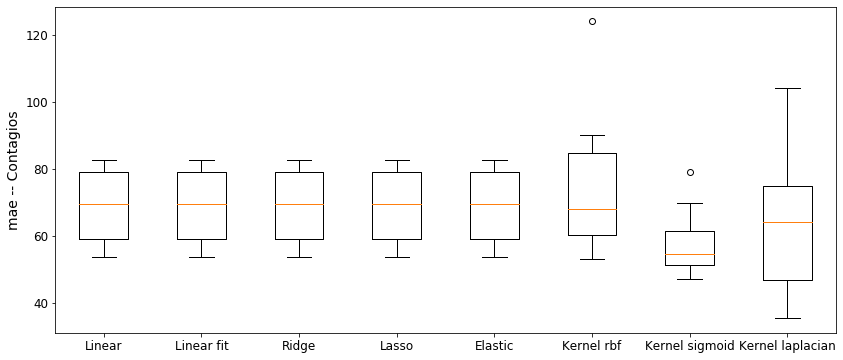

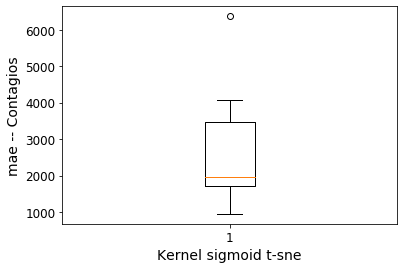

array([[  62.37611917,   62.37611917,   62.76490119,   62.40545149,
          62.40545149,   52.94807985,   53.8026233 ,   69.71538029,
        6368.27474028],
       [  80.91165196,   80.91165196,   80.76780924,   80.90217963,
          80.90217963,   67.98737287,   62.84812422,   35.47399105,
        1752.59284707],
       [  66.90165803,   66.90165803,   67.03246395,   66.91046417,
          66.91046417,   90.12246323,   51.24083917,   76.72900937,
         949.78180563],
       [  71.92014886,   71.92014886,   71.92039504,   71.92016431,
          71.92016431,   72.24801933,   55.56572624,   44.99361496,
        1698.09376723],
       [  74.44642756,   74.44642756,   74.52365311,   74.45140053,
          74.45140053,   57.71984072,   69.72027988,   43.86623639,
        4071.51773259],
       [  53.55534564,   53.55534564,   53.56982942,   53.55640861,
          53.55640861,   67.95864244,   47.18891189,   69.27312347,
        2621.43414348],
       [  56.72669696,   56.72669696,   

In [ ]:
mae1 = np.delete(mae, -1, axis=1)

plt.figure(figsize=(14,6))
plt.boxplot(mae1)
plt.xticks(ticks=np.arange(len(steps)-1)+1,
                      labels=label_model)
plt.ylabel('mae -- Contagios')

plt.figure()
plt.boxplot(mae[:,-1])
plt.xlabel(label_model[-1])
plt.ylabel('mae -- Contagios')

plt.show()
mae

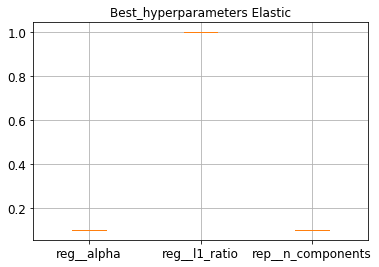

Modes=  [0.1 1.  0.1]


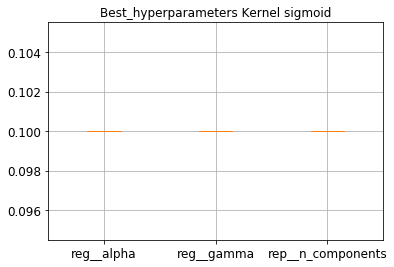

Modes=  [0.1 0.1 0.1]


In [ ]:
modelo = [4, 6] #Elastic Net y Kernel Ridge Sigmoide

def mode_hyperpar(modelo):    

    nh = len(best_hyperparams[0][modelo])
    hyperpar = np.zeros((Niter, nh))

    for i in range(Niter):
        for j in range(nh):
            hyperpar[i,j] = best_hyperparams[i][modelo].get(list(best_hyperparams[i][modelo].keys())[j])

    plt.boxplot(hyperpar)
    plt.xticks(ticks=np.arange(nh)+1,labels=list(best_hyperparams[0][modelo].keys()))
    plt.title('Best_hyperparameters ' + label_model[modelo])
    plt.grid()
    plt.show()
    
    mode_hyper = mode(hyperpar,axis=0)[0][0]
    print("Modes= ", mode_hyper)
    
    return mode_hyper, nh

mode_hyper_0, nh_0 = mode_hyperpar(modelo[0])
mode_hyper_1, nh_1 = mode_hyperpar(modelo[1])

In [ ]:
def train_model(modelo, nh, mode_hyper):
    model_f = Pipeline(steps[modelo])
    paramsf = params[modelo]
    hyperl = list(params[modelo].keys())

    for j in range(nh):
        paramsf[hyperl[j]] = mode_hyper[j]

    return model_f, paramsf

elastic, params_0 = train_model(modelo[0], nh_0, mode_hyper_0)
elastic.set_params(**params_0)
elastic.fit(X,y)

kernel, params_1 = train_model(modelo[1], nh_1, mode_hyper_1)
kernel.set_params(**params_1)
kernel.fit(X,y)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.1,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.1, coef0=1, degree=3, gamma=0.1,
                             kernel='sigmoid', kernel_params=None))],
         verbose=False)

In [ ]:
y_pred_e = elastic.predict(serie[len(serie)-w:].reshape(1,-1))[0]
y_pred_k = kernel.predict(serie[len(serie)-w:].reshape(1,-1))[0]

print('Predicción contagiados covid19 ',date.today(),
      '\nElastic Net: ', y_pred_e,
      '\nKernel Ridge (sigmoid): ', y_pred_k)

Predicción contagiados covid19  2020-05-07 
Elastic Net:  8224.406551231801 
Kernel Ridge (sigmoid):  [9686.90606352]


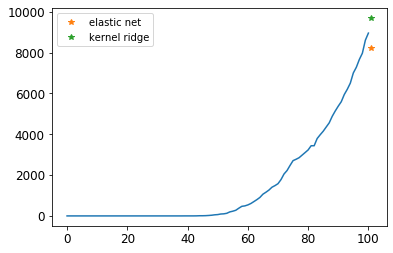

In [ ]:
plt.plot(y)
plt.plot(len(y),y_pred_e, '*', label='elastic net')
plt.plot(len(y),y_pred_k, '*', label='kernel ridge')

plt.legend(loc='best')
plt.show()

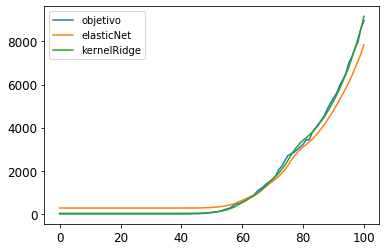

In [ ]:
plt.plot(y, label='objetivo')
plt.plot(elastic.predict(X), label='elasticNet')
plt.plot(kernel.predict(X), label='kernelRidge')

plt.legend(loc='best')
plt.show()

# Contagios por días

In [ ]:
stepsd = [
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', LinearRegression(fit_intercept = 'False'))],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', LinearRegression())],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', Ridge())],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', Lasso())],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', ElasticNet())],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', KernelRidge(kernel = 'rbf'))],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', KernelRidge(kernel = 'sigmoid'))],
    
    [('scaler', StandardScaler()),
    ('rep', PCA()),
    ('reg', KernelRidge(kernel = 'laplacian'))],
    
    [('scaler', StandardScaler()),
    ('rep', tsne_map(n_components = 2,  
                     perplexity = 10, 
                     n_neighbors = 3)),
    ('reg', KernelRidge(kernel = 'sigmoid'))],
    
    
]

paramsd = [
    
    {'rep__n_components': [0.1, 0.5, 0.9],
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,10)     
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5)
    }, #max_iter por defecto 1000
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5),
     'reg__l1_ratio': np.linspace(0.1,1,5)
    }, #max_iter por defecto 1000
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5),
     'reg__gamma': np.linspace(0.1,1,5),
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5),
     'reg__gamma': np.linspace(0.1,1,5),
    },
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'reg__alpha': np.linspace(0.1,1,5),
     'reg__gamma': np.linspace(0.1,1,5),
    },    

    {'reg__alpha': [0.1, 0.5, 0.9],
     'reg__gamma': np.linspace(0.1,1,5),
    }
    
]


label_model = ['Linear', 'Linear fit', 'Ridge', 'Lasso', 'Elastic', 
               'Kernel rbf', 'Kernel sigmoid', 'Kernel laplacian', 'Kernel sigmoid t-sne']

In [ ]:
Niter = 10 #Número de particiones
maed = np.zeros((Niter, len(stepsd))) #Error absoluto
best_estimatorsd = Niter*[len(stepsd)*[None]]
best_hyperparamsd = Niter*[len(stepsd)*[None]]

for j in range(Niter):
    
    print("Iteración %d/%d" %(j+1, Niter))
    Xtraind, Xtestd, ytraind, ytestd = train_test_split(
        Xd,yd,test_size=0.3) #Xtrain(70%) ytrain(30%)
    
    #Recorre los modelos
    for r in range(len(stepsd)):
        
        grid_searchd = GridSearchCV(Pipeline(stepsd[r]), paramsd[r],
                cv=5, verbose=5, scoring='neg_mean_absolute_error', n_jobs=4)
        
        #Entrenando
        grid_searchd.fit(Xtraind, ytraind)
        
        #Realizando predicción con el mejor modelo
        ypredd = grid_searchd.best_estimator_.predict(Xtestd)
        
        #Guardando el mejor modelo
        best_estimatorsd[j][r] = grid_searchd.best_estimator_
        
        #Guardando los mejores hiperparámetros
        best_hyperparamsd[j][r] = grid_searchd.best_params_
        
        #Guardando error
        maed[j,r] = mean_absolute_error(ytestd, ypred)
        
        print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(stepsd)))
        print('mae:',maed[j,r])

        savedata = {
            'acc':maed,
            'best_models':best_estimatorsd,
            'best_parameters':best_hyperparamsd,
              } 
        dump(savedata,'covid19_2.joblib')

Iteración 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 1/10-Modelo 1/9
mae: 1398.023716865389
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 1/10-Modelo 2/9
mae: 1398.023716865389
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 1/10-Modelo 3/9
mae: 1398.023716865389
Fitting 5 folds for each of 15 candidates, totalling 75 fits
it 1/10-Modelo 4/9
mae: 1398.023716865389
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 1/10-Modelo 5/9
mae: 1398.023716865389
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 1/10-Modelo 6/9
mae: 1398.023716865389
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 329 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 1/10-Modelo 7/9
mae: 1398.023716865389
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 1/10-Modelo 8/9
mae: 1398.023716865389
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    9.4s finished


it 1/10-Modelo 9/9
mae: 1398.023716865389
Iteración 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 2/10-Modelo 1/9
mae: 1355.6043620266792
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 2/10-Modelo 2/9
mae: 1355.6043620266792
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  29 tasks      | elapsed:    0.2s


it 2/10-Modelo 3/9
mae: 1355.6043620266792
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.1s


it 2/10-Modelo 4/9
mae: 1355.6043620266792
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 2/10-Modelo 5/9
mae: 1355.6043620266792
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 2/10-Modelo 6/9
mae: 1355.6043620266792
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 2/10-Modelo 7/9
mae: 1355.6043620266792
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 2/10-Modelo 8/9
mae: 1355.6043620266792
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   11.6s finished


it 2/10-Modelo 9/9
mae: 1355.6043620266792
Iteración 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 3/10-Modelo 1/9
mae: 1372.4108136395823
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 3/10-Modelo 2/9
mae: 1372.4108136395823


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s


it 3/10-Modelo 3/9
mae: 1372.4108136395823
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 3/10-Modelo 4/9
mae: 1372.4108136395823
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 3/10-Modelo 5/9
mae: 1372.4108136395823
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 3/10-Modelo 6/9
mae: 1372.4108136395823
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 326 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 3/10-Modelo 7/9
mae: 1372.4108136395823
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 3/10-Modelo 8/9
mae: 1372.4108136395823
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.1s finished


it 3/10-Modelo 9/9
mae: 1372.4108136395823
Iteración 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 4/10-Modelo 1/9
mae: 1396.6366200911953
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished


it 4/10-Modelo 2/9
mae: 1396.6366200911953
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 4/10-Modelo 3/9
mae: 1396.6366200911953
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 4/10-Modelo 4/9
mae: 1396.6366200911953
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 4/10-Modelo 5/9
mae: 1396.6366200911953
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 4/10-Modelo 6/9
mae: 1396.6366200911953
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 323 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 4/10-Modelo 7/9
mae: 1396.6366200911953
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 4/10-Modelo 8/9
mae: 1396.6366200911953
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   11.9s finished


it 4/10-Modelo 9/9
mae: 1396.6366200911953
Iteración 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 5/10-Modelo 1/9
mae: 1398.5075878331309
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.1s


it 5/10-Modelo 2/9
mae: 1398.5075878331309
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done 143 out of 150 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 5/10-Modelo 3/9
mae: 1398.5075878331309
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 5/10-Modelo 4/9
mae: 1398.5075878331309
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 5/10-Modelo 5/9
mae: 1398.5075878331309
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 5/10-Modelo 6/9
mae: 1398.5075878331309
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 5/10-Modelo 7/9
mae: 1398.5075878331309
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 5/10-Modelo 8/9
mae: 1398.5075878331309
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   11.9s finished


it 5/10-Modelo 9/9
mae: 1398.5075878331309
Iteración 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 6/10-Modelo 1/9
mae: 1430.6688781557114
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s


it 6/10-Modelo 2/9
mae: 1430.6688781557114
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.2s


it 6/10-Modelo 3/9
mae: 1430.6688781557114
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s


it 6/10-Modelo 4/9
mae: 1430.6688781557114
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 326 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 6/10-Modelo 5/9
mae: 1430.6688781557114
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 6/10-Modelo 6/9
mae: 1430.6688781557114
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 326 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 6/10-Modelo 7/9
mae: 1430.6688781557114
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 6/10-Modelo 8/9
mae: 1430.6688781557114
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.2s finished


it 6/10-Modelo 9/9
mae: 1430.6688781557114
Iteración 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 7/10-Modelo 1/9
mae: 1356.797910413776


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 7/10-Modelo 2/9
mae: 1356.797910413776
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 7/10-Modelo 3/9
mae: 1356.797910413776
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 7/10-Modelo 4/9
mae: 1356.797910413776
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 323 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 7/10-Modelo 5/9
mae: 1356.797910413776
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 7/10-Modelo 6/9
mae: 1356.797910413776
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 329 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 7/10-Modelo 7/9
mae: 1356.797910413776
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 7/10-Modelo 8/9
mae: 1356.797910413776
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.9s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.6s finished


it 7/10-Modelo 9/9
mae: 1356.797910413776
Iteración 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 8/10-Modelo 1/9
mae: 1367.3785555750662
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished


it 8/10-Modelo 2/9
mae: 1367.3785555750662
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 8/10-Modelo 3/9
mae: 1367.3785555750662
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.1s


it 8/10-Modelo 4/9
mae: 1367.3785555750662
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 8/10-Modelo 5/9
mae: 1367.3785555750662
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 8/10-Modelo 6/9
mae: 1367.3785555750662
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 8/10-Modelo 7/9
mae: 1367.3785555750662
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 8/10-Modelo 8/9
mae: 1367.3785555750662
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.2s finished


it 8/10-Modelo 9/9
mae: 1367.3785555750662
Iteración 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 9/10-Modelo 1/9
mae: 1369.3799089561983
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 9/10-Modelo 2/9

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



mae: 1369.3799089561983
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 143 out of 150 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 9/10-Modelo 3/9
mae: 1369.3799089561983
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 9/10-Modelo 4/9
mae: 1369.3799089561983
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 323 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 9/10-Modelo 5/9
mae: 1369.3799089561983
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 9/10-Modelo 6/9
mae: 1369.3799089561983
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 9/10-Modelo 7/9
mae: 1369.3799089561983
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 9/10-Modelo 8/9
mae: 1369.3799089561983
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   12.4s finished


it 9/10-Modelo 9/9
mae: 1369.3799089561983
Iteración 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 10/10-Modelo 1/9
mae: 1366.2508766981337
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.1s finished


it 10/10-Modelo 2/9
mae: 1366.2508766981337
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s


it 10/10-Modelo 3/9
mae: 1366.2508766981337
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.1s


it 10/10-Modelo 4/9
mae: 1366.2508766981337
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done 323 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 10/10-Modelo 5/9
mae: 1366.2508766981337
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 10/10-Modelo 6/9
mae: 1366.2508766981337
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 10/10-Modelo 7/9
mae: 1366.2508766981337
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 368 out of 375 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


it 10/10-Modelo 8/9
mae: 1366.2508766981337
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   13.6s finished


it 10/10-Modelo 9/9
mae: 1366.2508766981337


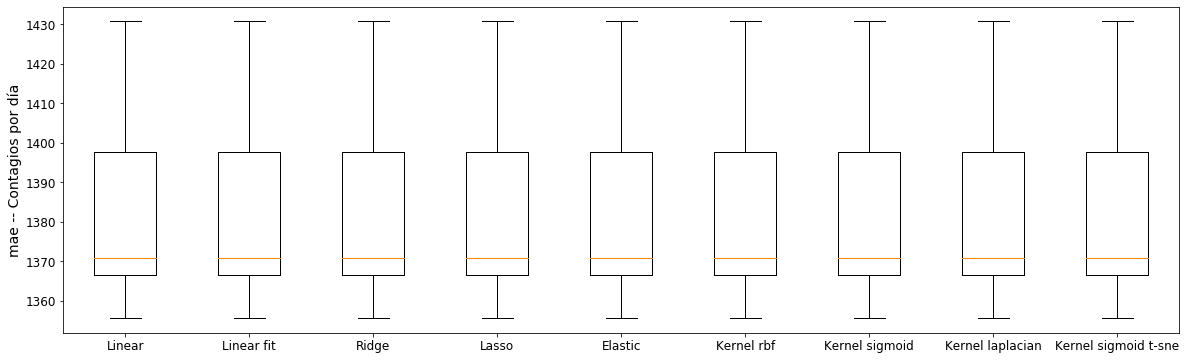

array([[1398.02371687, 1398.02371687, 1398.02371687, 1398.02371687,
        1398.02371687, 1398.02371687, 1398.02371687, 1398.02371687,
        1398.02371687],
       [1355.60436203, 1355.60436203, 1355.60436203, 1355.60436203,
        1355.60436203, 1355.60436203, 1355.60436203, 1355.60436203,
        1355.60436203],
       [1372.41081364, 1372.41081364, 1372.41081364, 1372.41081364,
        1372.41081364, 1372.41081364, 1372.41081364, 1372.41081364,
        1372.41081364],
       [1396.63662009, 1396.63662009, 1396.63662009, 1396.63662009,
        1396.63662009, 1396.63662009, 1396.63662009, 1396.63662009,
        1396.63662009],
       [1398.50758783, 1398.50758783, 1398.50758783, 1398.50758783,
        1398.50758783, 1398.50758783, 1398.50758783, 1398.50758783,
        1398.50758783],
       [1430.66887816, 1430.66887816, 1430.66887816, 1430.66887816,
        1430.66887816, 1430.66887816, 1430.66887816, 1430.66887816,
        1430.66887816],
       [1356.79791041, 1356.79791041, 13

In [ ]:
plt.figure(figsize=(20,6))
plt.boxplot(maed)
plt.xticks(ticks=np.arange(len(steps))+1,
                      labels=label_model)
plt.ylabel('mae -- Contagios por día')
plt.show()
maed

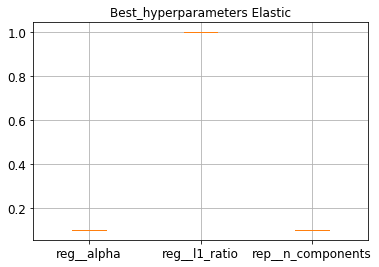

Modes=  [0.1 1.  0.1]


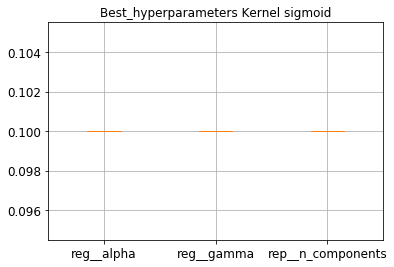

Modes=  [0.1 0.1 0.1]


In [ ]:
#Train

mode_hyper_0d, nh_0d = mode_hyperpar(modelo[0])
mode_hyper_1d, nh_1d = mode_hyperpar(modelo[1])

In [ ]:
elasticd, params_0d = train_model(modelo[0], nh_0d, mode_hyper_0d)
elasticd.set_params(**params_0d)
elasticd.fit(Xd,yd)

kerneld, params_1d = train_model(modelo[1], nh_1d, mode_hyper_1d)
kerneld.set_params(**params_1d)
kerneld.fit(Xd,yd)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.1,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.1, coef0=1, degree=3, gamma=0.1,
                             kernel='sigmoid', kernel_params=None))],
         verbose=False)

In [ ]:
y_pred_ed = elasticd.predict(serie_d[len(serie_d)-w:].reshape(1,-1))[0]
y_pred_kd = kerneld.predict(serie_d[len(serie_d)-w:].reshape(1,-1))[0]

print('Predicción contagiados covid19 ',date.today(),
      '\nElastic Net: ', y_pred_ed,
      '\nKernel Ridge (sigmoid): ', y_pred_kd)

Predicción contagiados covid19  2020-05-07 
Elastic Net:  373.61862752788176 
Kernel Ridge (sigmoid):  [444.8089572]


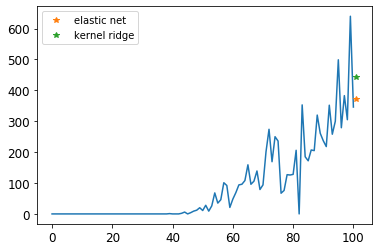

In [ ]:
plt.plot(yd)
plt.plot(len(yd),y_pred_ed, '*', label='elastic net')
plt.plot(len(yd),y_pred_kd, '*', label='kernel ridge')

plt.legend(loc='best')
plt.show()

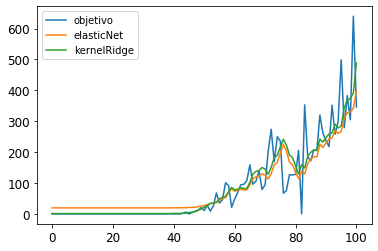

In [ ]:
plt.plot(yd, label='objetivo')
plt.plot(elasticd.predict(Xd), label='elasticNet')
plt.plot(kerneld.predict(Xd), label='kernelRidge')

plt.legend(loc='best')
plt.show()